In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 8)})

In [3]:
enem_df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.01,
    sep=';'
)

In [4]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595665,2019,3513801,Diadema,35,SP,19.0,F,1,1,...,A,A,A,C,A,A,D,A,B,B
1,190001409448,2019,2800308,Aracaju,28,SE,26.0,F,1,3,...,A,A,A,B,B,A,B,A,B,B
2,190001599150,2019,3519600,Ibitinga,35,SP,22.0,M,1,1,...,A,A,A,B,A,A,B,B,B,B
3,190001133237,2019,2304400,Fortaleza,23,CE,25.0,M,2,3,...,B,A,A,B,A,A,C,A,A,B
4,190002972986,2019,5300108,Brasília,53,DF,25.0,M,1,3,...,B,A,B,D,A,A,E,A,B,B


# Separando as colunas das notas

In [5]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_df[grades].head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
0,563.7,595.9,587.9,533.6,620.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,554.1,479.6,477.9,561.4,560.0
4,479.6,538.5,402.5,459.6,640.0


# Retirando valores nulos 

In [6]:
enem_df[grades].isnull().sum()

NU_NOTA_LC         11814
NU_NOTA_CH         11814
NU_NOTA_CN         13931
NU_NOTA_MT         13931
NU_NOTA_REDACAO    11814
dtype: int64

In [7]:
enem_df.dropna(inplace=True)

# Calculando a média geral de cada candidato

In [8]:
enem_df['NU_NOTA_GERAL'] = enem_df[grades].sum(axis=1) / 5

grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']

pd.DataFrame(enem_df['NU_NOTA_GERAL'].head(10))

,NU_NOTA_GERAL
22,420.96
24,483.04
35,549.28
41,530.60
44,476.60
51,527.60
82,667.52
86,754.32
87,495.40
88,463.92


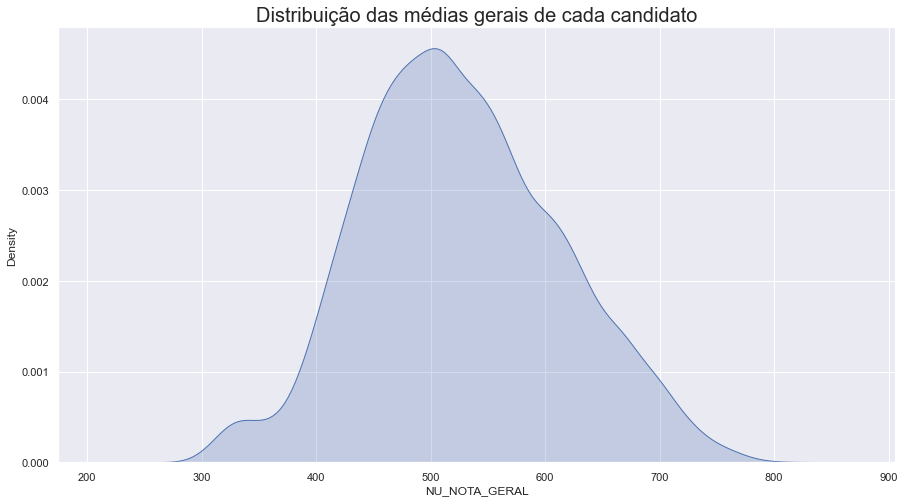

In [9]:
sns.kdeplot(data=enem_df['NU_NOTA_GERAL'], fill=True, palette="Spectral")

plt.title('Distribuição das médias gerais de cada candidato', fontsize=20)
plt.show()

# Distribuição das notas de cada área do conhecimento

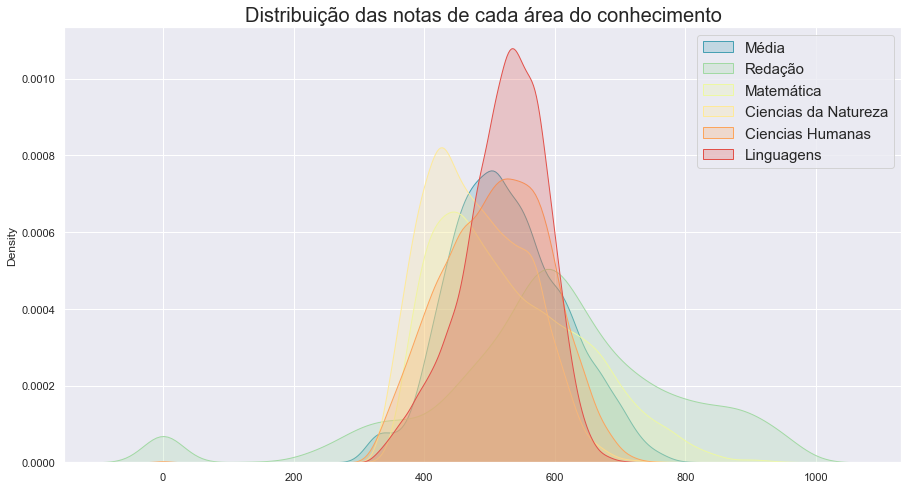

In [10]:
sns.kdeplot(data=enem_df[grades], fill=True, palette="Spectral")

plt.legend(['Média', 'Redação', 'Matemática', 'Ciencias da Natureza', 'Ciencias Humanas', 'Linguagens'], fontsize=15)
plt.title('Distribuição das notas de cada área do conhecimento', fontsize=20)
plt.show()

# Comparando as notas de cada área com a média geral

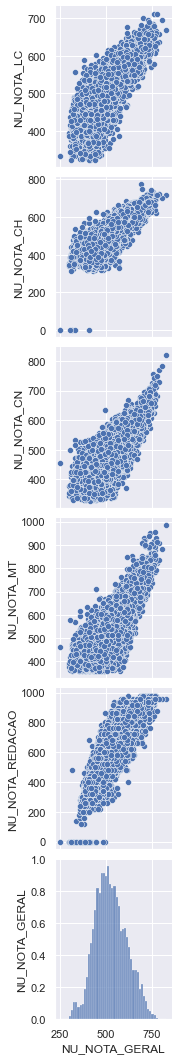

In [15]:
sns.pairplot(enem_df[grades], x_vars='NU_NOTA_GERAL')
plt.show()

# Comparando o desempenho geral com o gênero

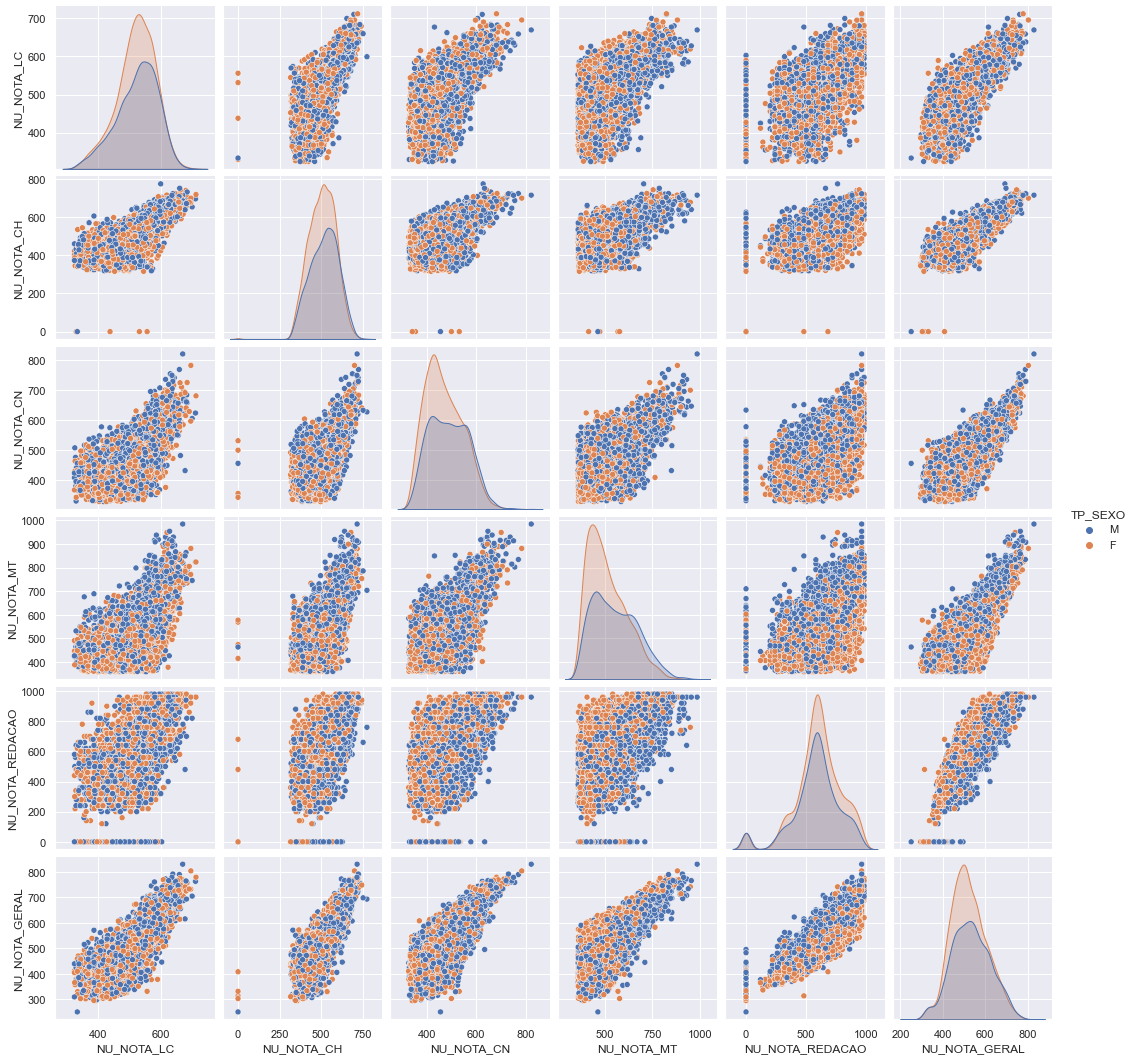

In [14]:
grades_vs_gender = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL', 'TP_SEXO']
sns.pairplot(enem_df[grades_vs_gender], hue='TP_SEXO')
plt.show()